In [26]:
# -*- coding: utf-8 -*-
"""loss_functions.py

Author: Mayank Kunwar
Find Me: https://in.linkedin.com/in/mayankkunwar93
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from PIL import Image

# Load and preprocess the image
image_path = '/content/test_image_2.jpg'
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_array = np.array(image, dtype=float)

In [27]:
# Compute the 2D FFT
fft_image = fftpack.fft2(image_array)

# Shift the zero frequency component to the center
fft_image_shifted = fftpack.fftshift(fft_image)


In [28]:
# Apply a high-pass filter (remove low frequencies)
rows, cols = image_array.shape
crow, ccol = rows // 2, cols // 2  # center coordinates
radius_highpass = 30  # radius of the circle to remove low frequencies for high-pass

# Create a mask (circle) for high-pass filtering
mask_highpass = np.ones((rows, cols), dtype=bool)
r, c = np.ogrid[:rows, :cols]
mask_highpass[(r - crow)**2 + (c - ccol)**2 <= radius_highpass**2] = False

# Apply the mask to the shifted Fourier spectrum for high-pass filtering
fft_image_shifted_highpass = fft_image_shifted.copy()
fft_image_shifted_highpass[mask_highpass] = 0

# Shift the zero frequency component back to the corner
fft_image_highpass = fftpack.ifftshift(fft_image_shifted_highpass)

# Reconstruct the image using inverse FFT for high-pass
image_highpass = fftpack.ifft2(fft_image_highpass).real


In [29]:
# Apply a low-pass filter (remove high frequencies)
radius_lowpass = 30  # radius of the circle to remove high frequencies for low-pass

# Create a mask (circle) for low-pass filtering
mask_lowpass = np.ones((rows, cols), dtype=bool)
mask_lowpass[(r - crow)**2 + (c - ccol)**2 > radius_lowpass**2] = False

# Apply the mask to the shifted Fourier spectrum for low-pass filtering
fft_image_shifted_lowpass = fft_image_shifted.copy()
fft_image_shifted_lowpass[mask_lowpass] = 0

# Shift the zero frequency component back to the corner
fft_image_lowpass = fftpack.ifftshift(fft_image_shifted_lowpass)

# Reconstruct the image using inverse FFT for low-pass
image_lowpass = fftpack.ifft2(fft_image_lowpass).real

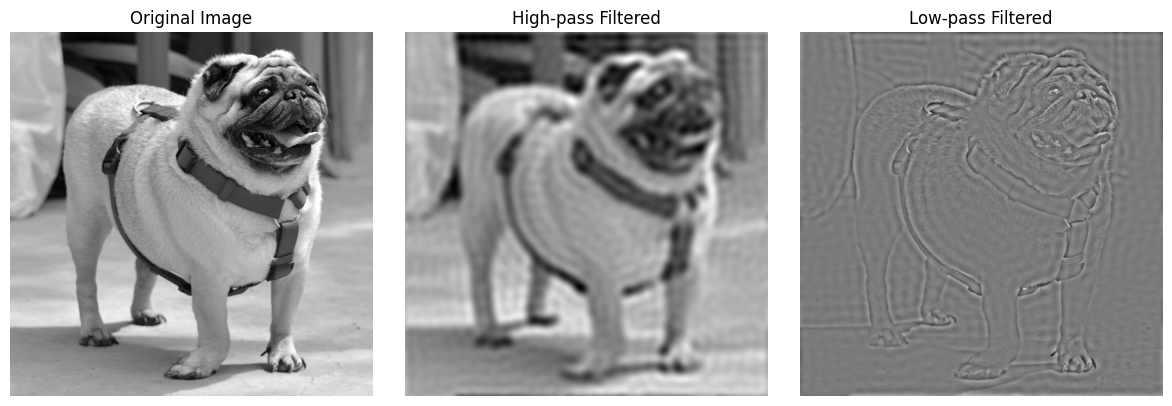

In [30]:
# Plot all images in a single row
plt.figure(figsize=(12, 4))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# High-pass Filtered Image
plt.subplot(1, 3, 2)
plt.imshow(image_highpass, cmap='gray')
plt.title('High-pass Filtered')
plt.axis('off')

# Low-pass Filtered Image
plt.subplot(1, 3, 3)
plt.imshow(image_lowpass, cmap='gray')
plt.title('Low-pass Filtered')
plt.axis('off')

plt.tight_layout()
plt.show()